In [1]:
import glob
import pandas as pd
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
data_dir = '../data/'

In [5]:
files = glob.glob(data_dir + '*.parquet')

In [6]:
data = pd.read_parquet(files[0])

In [7]:
columns = data.columns

In [ ]:
### looking at returns

In [8]:
brcols = [col for col in columns if 'book_return' in col and 'avg' not in col and 'sum' not in col and 'max' not in col and 'min' not in col]
brcols

['WBTC-USD:book_return',
 'ADA-USD:book_return',
 'XLM-USD:book_return',
 'DOGE-USD:book_return',
 'CRV-USD:book_return',
 'BTC-USD:book_return',
 'AAVE-USD:book_return',
 'ZEC-USD:book_return',
 'BCH-USD:book_return',
 'EOS-USD:book_return',
 'ETH-USD:book_return',
 'SHIB-USD:book_return',
 'COMP-USD:book_return',
 'BAL-USD:book_return',
 'SUSHI-USD:book_return',
 'LTC-USD:book_return',
 'ETC-USD:book_return',
 'MKR-USD:book_return',
 'ALGO-USD:book_return',
 'UNI-USD:book_return']

In [9]:
data = pd.DataFrame(columns=brcols)
for file in files:
    df = pd.read_parquet(file, columns=brcols)
    data = pd.concat([data, df])

In [11]:
data.shape

(2411507, 20)

In [12]:
data.isna().sum().sum()

30

In [13]:
data = data.fillna(0.)

In [14]:
data.describe()

,WBTC-USD:book_return,ADA-USD:book_return,XLM-USD:book_return,DOGE-USD:book_return,CRV-USD:book_return,BTC-USD:book_return,AAVE-USD:book_return,ZEC-USD:book_return,BCH-USD:book_return,EOS-USD:book_return,ETH-USD:book_return,SHIB-USD:book_return,COMP-USD:book_return,BAL-USD:book_return,SUSHI-USD:book_return,LTC-USD:book_return,ETC-USD:book_return,MKR-USD:book_return,ALGO-USD:book_return,UNI-USD:book_return
count,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06
mean,9.837922e-08,1.335924e-07,6.889386e-08,5.070149e-08,2.350565e-07,9.742285e-08,1.931495e-07,1.120120e-08,8.546433e-08,6.961277e-08,1.139775e-07,1.034310e-07,2.032000e-07,9.167793e-08,1.140308e-07,1.178222e-07,1.425746e-07,1.167317e-07,1.099802e-07,8.896156e-08
std,2.239474e-04,1.088287e-04,9.404068e-05,1.319397e-04,1.826041e-04,5.993743e-05,1.441833e-04,1.448187e-04,9.900192e-05,1.160449e-04,7.586994e-05,1.268116e-04,2.004539e-04,1.465575e-04,1.950906e-04,1.159668e-04,1.476073e-04,1.377381e-04,1.237535e-04,1.085201e-04
min,-2.447478e-02,-1.854961e-02,-6.253038e-03,-9.357153e-03,-2.738420e-02,-7.460905e-03,-2.168686e-02,-1.438681e-02,-1.064079e-02,-9.177662e-03,-1.039294e-02,-1.071929e-02,-1.790243e-02,-1.089016e-02,-1.259947e-02,-7.447918e-03,-1.229567e-02,-1.042718e-02,-1.182421e-02,-8.072204e-03
25%,0.000000e+00,-3.212746e-07,-1.660387e-05,-1.425869e-05,0.000000e+00,-1.204835e-05,-1.772544e-06,0.000000e+00,-3.578691e-06,0.000000e+00,-1.675434e-05,-6.870060e-13,0.000000e+00,0.000000e+00,0.000000e+00,-1.345706e-05,0.000000e+00,-4.075784e-10,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.726742e-10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,5.452218e-07,1.526496e-05,1.470571e-05,0.000000e+00,1.208072e-05,1.600581e-06,0.000000e+00,4.040188e-06,0.000000e+00,1.650062e-05,1.208579e-08,0.000000e+00,0.000000e+00,0.000000e+00,1.410674e-05,0.000000e+00,0.000000e+00,6.599270e-08,0.000000e+00
max,2.483759e-02,1.050435e-02,7.784177e-03,1.809238e-02,6.041070e-02,1.223465e-02,3.629906e-02,2.727407e-02,8.221509e-03,8.054491e-03,6.014247e-03,1.930620e-02,2.647333e-02,1.618608e-02,1.661169e-02,8.017711e-03,8.075539e-03,1.369859e-02,1.162319e-02,9.950987e-03


In [16]:
corr = data.corr()
corr

,WBTC-USD:book_return,ADA-USD:book_return,XLM-USD:book_return,DOGE-USD:book_return,CRV-USD:book_return,BTC-USD:book_return,AAVE-USD:book_return,ZEC-USD:book_return,BCH-USD:book_return,EOS-USD:book_return,ETH-USD:book_return,SHIB-USD:book_return,COMP-USD:book_return,BAL-USD:book_return,SUSHI-USD:book_return,LTC-USD:book_return,ETC-USD:book_return,MKR-USD:book_return,ALGO-USD:book_return,UNI-USD:book_return
WBTC-USD:book_return,1.000000,0.040662,0.030855,0.025951,0.024400,0.078455,0.027543,0.028365,0.032039,0.031868,0.029059,0.033985,0.024291,0.023397,0.031810,0.028391,0.028450,0.028651,0.032398,0.030656
ADA-USD:book_return,0.040662,1.000000,0.327837,0.370961,0.266712,0.396736,0.330945,0.271006,0.336146,0.269624,0.401150,0.256000,0.186093,0.142731,0.265086,0.343417,0.310189,0.259074,0.382077,0.344491
XLM-USD:book_return,0.030855,0.327837,1.000000,0.313582,0.224799,0.335434,0.285097,0.242376,0.286106,0.235614,0.331279,0.225400,0.170162,0.137684,0.231503,0.272409,0.253690,0.231422,0.320654,0.308221
DOGE-USD:book_return,0.025951,0.370961,0.313582,1.000000,0.252578,0.391816,0.317655,0.261318,0.324584,0.264515,0.431119,0.312388,0.176315,0.137490,0.251876,0.336580,0.291718,0.243954,0.367851,0.353811
CRV-USD:book_return,0.024400,0.266712,0.224799,0.252578,1.000000,0.279753,0.238154,0.190189,0.235830,0.192466,0.293411,0.189649,0.136900,0.103816,0.188034,0.223437,0.202956,0.186456,0.265494,0.254380
BTC-USD:book_return,0.078455,0.396736,0.335434,0.391816,0.279753,1.000000,0.349121,0.271837,0.366289,0.282819,0.592605,0.261285,0.178415,0.139305,0.273022,0.369023,0.281172,0.260933,0.384860,0.377928
AAVE-USD:book_return,0.027543,0.330945,0.285097,0.317655,0.238154,0.349121,1.000000,0.241068,0.298409,0.229181,0.360328,0.218485,0.174904,0.125510,0.231880,0.281159,0.247618,0.232263,0.332201,0.319154
ZEC-USD:book_return,0.028365,0.271006,0.242376,0.261318,0.190189,0.271837,0.241068,1.000000,0.240132,0.208184,0.271105,0.200554,0.151739,0.123696,0.199492,0.225791,0.216915,0.196317,0.275823,0.261481
BCH-USD:book_return,0.032039,0.336146,0.286106,0.324584,0.235830,0.366289,0.298409,0.240132,1.000000,0.233761,0.360649,0.223224,0.165436,0.120216,0.227254,0.301186,0.277408,0.229158,0.328565,0.310026
EOS-USD:book_return,0.031868,0.269624,0.235614,0.264515,0.192466,0.282819,0.229181,0.208184,0.233761,1.000000,0.282987,0.204989,0.146936,0.119802,0.196233,0.230239,0.222616,0.186343,0.267505,0.252407


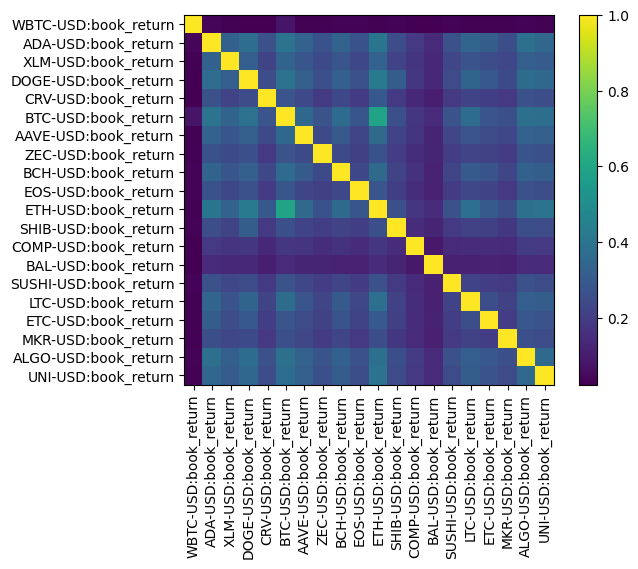

In [17]:
plt.imshow(corr)
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), data.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

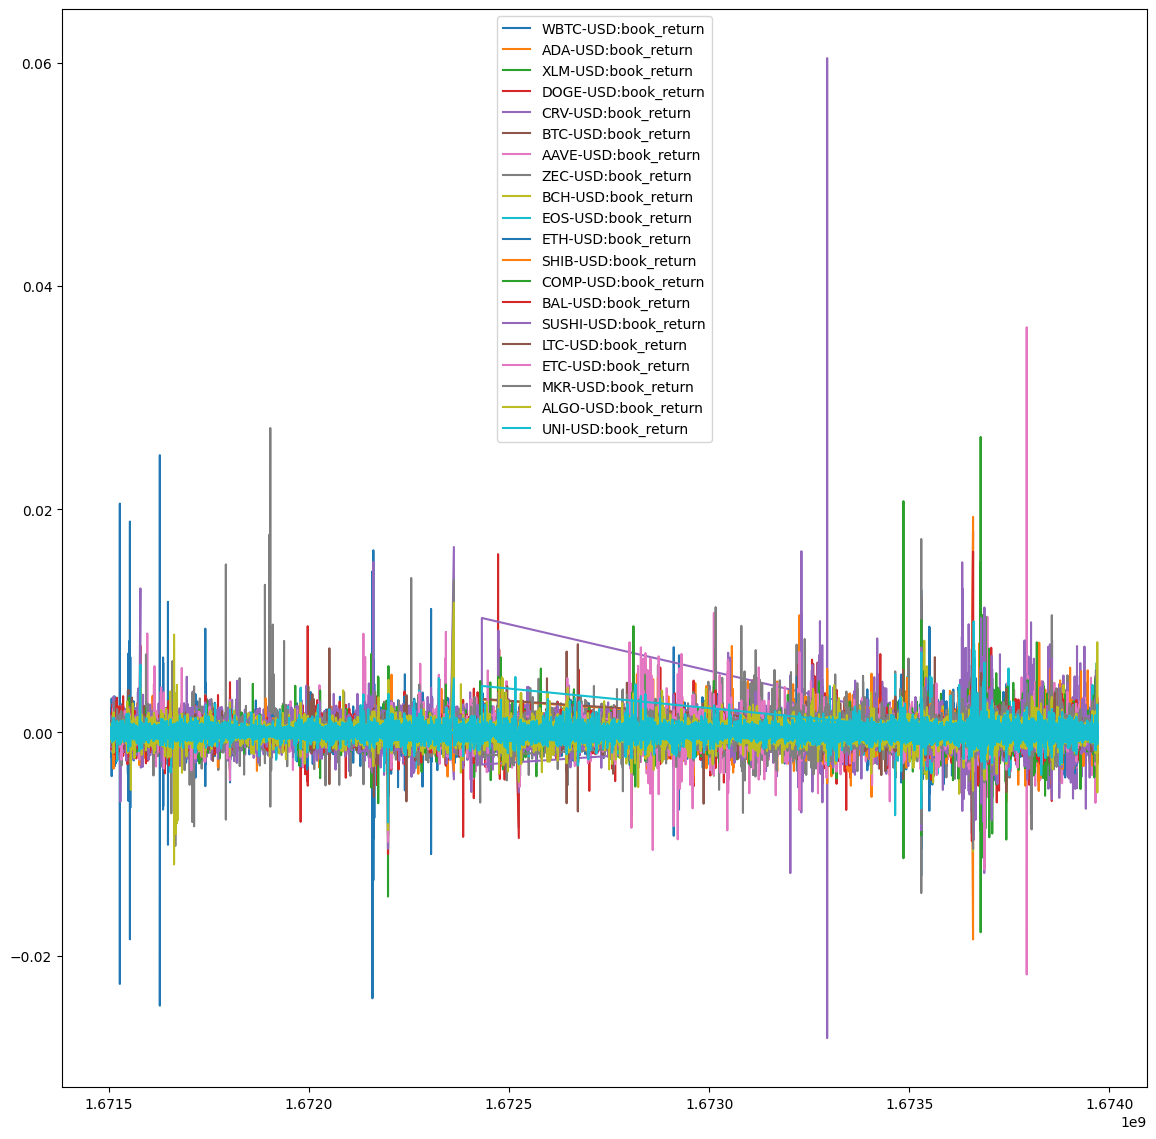

In [18]:
f,ax=plt.subplots(figsize=(14,14))
data.plot(ax=ax)

In [ ]:
### look at return 27sum

In [19]:
brcols27 = [col for col in columns if 'book_return_27sum' in col]
brcols27

['WBTC-USD:book_return_27sum',
 'ADA-USD:book_return_27sum',
 'XLM-USD:book_return_27sum',
 'DOGE-USD:book_return_27sum',
 'CRV-USD:book_return_27sum',
 'BTC-USD:book_return_27sum',
 'AAVE-USD:book_return_27sum',
 'ZEC-USD:book_return_27sum',
 'BCH-USD:book_return_27sum',
 'EOS-USD:book_return_27sum',
 'ETH-USD:book_return_27sum',
 'SHIB-USD:book_return_27sum',
 'COMP-USD:book_return_27sum',
 'BAL-USD:book_return_27sum',
 'SUSHI-USD:book_return_27sum',
 'LTC-USD:book_return_27sum',
 'ETC-USD:book_return_27sum',
 'MKR-USD:book_return_27sum',
 'ALGO-USD:book_return_27sum',
 'UNI-USD:book_return_27sum']

In [20]:
data = pd.DataFrame(columns=brcols27)
for file in files:
    df = pd.read_parquet(file, columns=brcols27)
    data = pd.concat([data, df])

In [21]:
data.isna().sum().sum()

0

In [22]:
corr = data.corr()
corr

,WBTC-USD:book_return_27sum,ADA-USD:book_return_27sum,XLM-USD:book_return_27sum,DOGE-USD:book_return_27sum,CRV-USD:book_return_27sum,BTC-USD:book_return_27sum,AAVE-USD:book_return_27sum,ZEC-USD:book_return_27sum,BCH-USD:book_return_27sum,EOS-USD:book_return_27sum,ETH-USD:book_return_27sum,SHIB-USD:book_return_27sum,COMP-USD:book_return_27sum,BAL-USD:book_return_27sum,SUSHI-USD:book_return_27sum,LTC-USD:book_return_27sum,ETC-USD:book_return_27sum,MKR-USD:book_return_27sum,ALGO-USD:book_return_27sum,UNI-USD:book_return_27sum
WBTC-USD:book_return_27sum,1.000000,0.348818,0.326677,0.335647,0.286717,0.557627,0.299739,0.306920,0.329067,0.333893,0.442973,0.295284,0.253188,0.275325,0.304046,0.320564,0.320008,0.330122,0.337240,0.340965
ADA-USD:book_return_27sum,0.348818,1.000000,0.606849,0.628250,0.505373,0.608885,0.549940,0.550766,0.575412,0.584204,0.623361,0.510805,0.455525,0.463675,0.552993,0.565526,0.603100,0.573136,0.621458,0.601724
XLM-USD:book_return_27sum,0.326677,0.606849,1.000000,0.613237,0.484743,0.580300,0.537808,0.554141,0.556535,0.573345,0.587824,0.507426,0.456960,0.472989,0.545678,0.519916,0.567386,0.569533,0.612009,0.603524
DOGE-USD:book_return_27sum,0.335647,0.628250,0.613237,1.000000,0.500564,0.620820,0.552754,0.566007,0.575921,0.610045,0.670373,0.607527,0.461713,0.478482,0.564178,0.591490,0.599109,0.577083,0.631699,0.635786
CRV-USD:book_return_27sum,0.286717,0.505373,0.484743,0.500564,1.000000,0.501728,0.460719,0.456311,0.461650,0.480560,0.520987,0.428221,0.380019,0.386757,0.460933,0.431936,0.471043,0.478126,0.508678,0.507612
BTC-USD:book_return_27sum,0.557627,0.608885,0.580300,0.620820,0.501728,1.000000,0.534886,0.534710,0.575042,0.578576,0.806817,0.502525,0.432403,0.454550,0.535122,0.569207,0.551469,0.564303,0.600527,0.606521
AAVE-USD:book_return_27sum,0.299739,0.549940,0.537808,0.552754,0.460719,0.534886,1.000000,0.512259,0.518961,0.528165,0.559420,0.460608,0.443731,0.432446,0.514141,0.476073,0.512194,0.532793,0.564094,0.571020
ZEC-USD:book_return_27sum,0.306920,0.550766,0.554141,0.566007,0.456311,0.534710,0.512259,1.000000,0.521234,0.551628,0.546545,0.477230,0.440232,0.451964,0.510574,0.486321,0.528214,0.536032,0.574322,0.565972
BCH-USD:book_return_27sum,0.329067,0.575412,0.556535,0.575921,0.461650,0.575042,0.518961,0.521234,1.000000,0.562114,0.574865,0.477250,0.432747,0.441042,0.510331,0.517815,0.550926,0.535809,0.570344,0.557972
EOS-USD:book_return_27sum,0.333893,0.584204,0.573345,0.610045,0.480560,0.578576,0.528165,0.551628,0.562114,1.000000,0.596433,0.501737,0.456867,0.472021,0.531841,0.524246,0.568953,0.550835,0.597237,0.585311


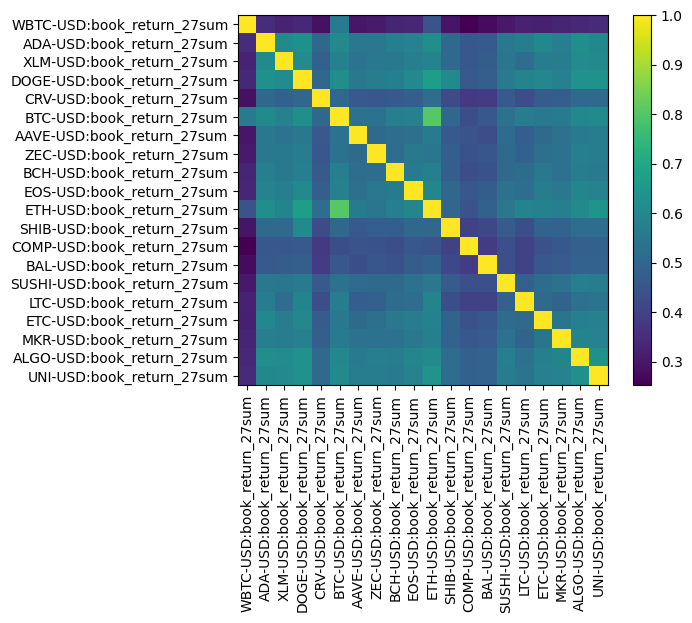

In [23]:
plt.imshow(corr)
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), data.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

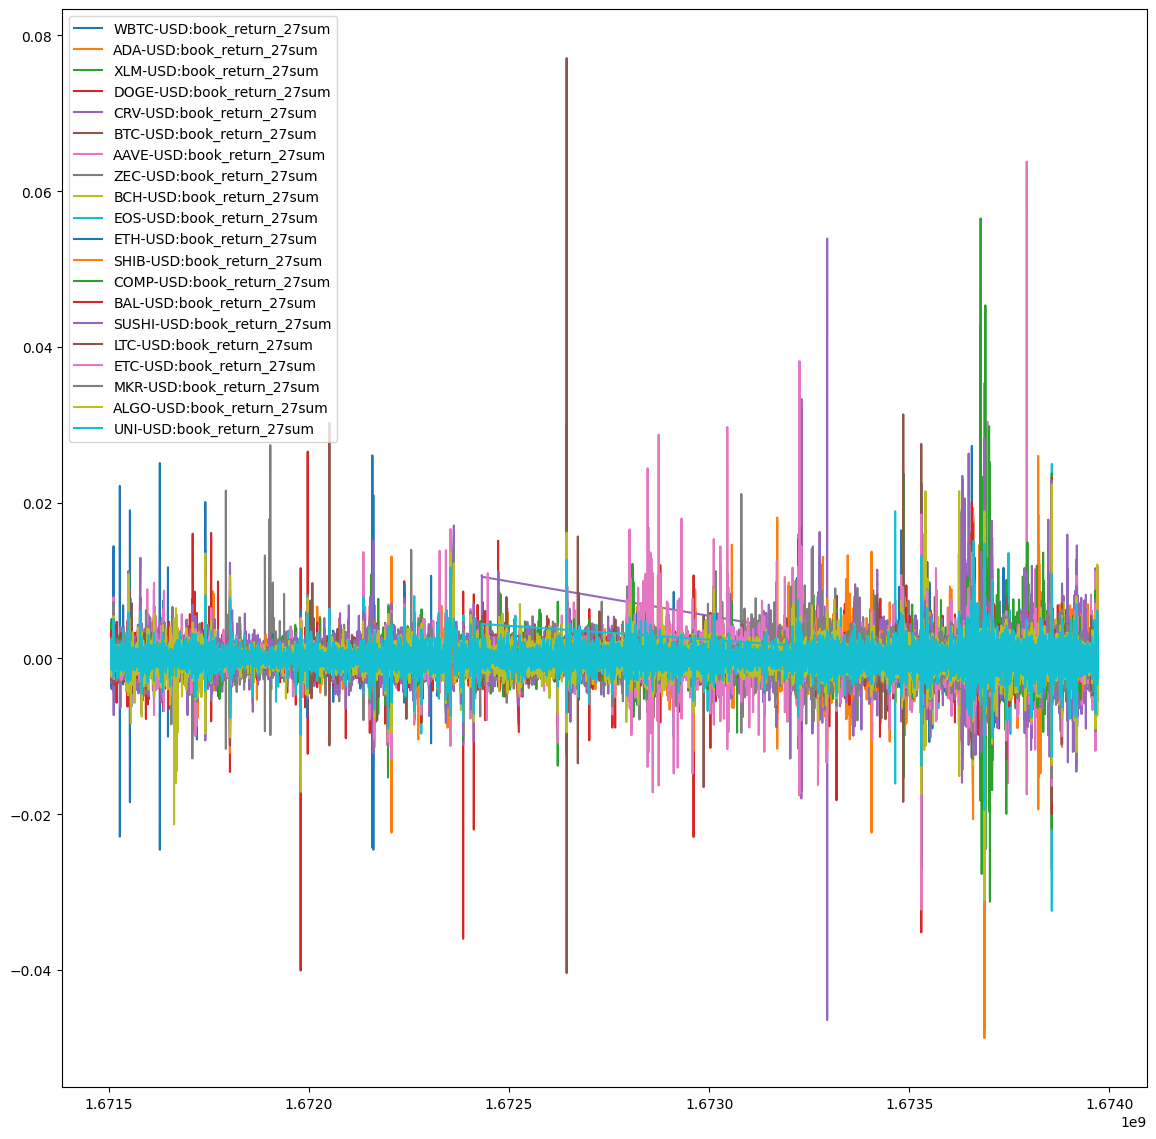

In [24]:
f,ax=plt.subplots(figsize=(14,14))
data.plot(ax=ax)

In [ ]:
### look at trade volume

In [25]:
tvcols162 = [col for col in columns if 'trade_volume_162sum' in col]
tvcols162

['WBTC-USD:trade_volume_162sum',
 'ADA-USD:trade_volume_162sum',
 'XLM-USD:trade_volume_162sum',
 'DOGE-USD:trade_volume_162sum',
 'CRV-USD:trade_volume_162sum',
 'BTC-USD:trade_volume_162sum',
 'AAVE-USD:trade_volume_162sum',
 'ZEC-USD:trade_volume_162sum',
 'BCH-USD:trade_volume_162sum',
 'EOS-USD:trade_volume_162sum',
 'ETH-USD:trade_volume_162sum',
 'SHIB-USD:trade_volume_162sum',
 'COMP-USD:trade_volume_162sum',
 'BAL-USD:trade_volume_162sum',
 'SUSHI-USD:trade_volume_162sum',
 'LTC-USD:trade_volume_162sum',
 'ETC-USD:trade_volume_162sum',
 'MKR-USD:trade_volume_162sum',
 'ALGO-USD:trade_volume_162sum',
 'UNI-USD:trade_volume_162sum']

In [26]:
data = pd.DataFrame(columns=tvcols162)
for file in files:
    df = pd.read_parquet(file, columns=tvcols162)
    data = pd.concat([data, df])

In [27]:
data.isna().sum().sum()

0

In [28]:
data.describe()

,WBTC-USD:trade_volume_162sum,ADA-USD:trade_volume_162sum,XLM-USD:trade_volume_162sum,DOGE-USD:trade_volume_162sum,CRV-USD:trade_volume_162sum,BTC-USD:trade_volume_162sum,AAVE-USD:trade_volume_162sum,ZEC-USD:trade_volume_162sum,BCH-USD:trade_volume_162sum,EOS-USD:trade_volume_162sum,ETH-USD:trade_volume_162sum,SHIB-USD:trade_volume_162sum,COMP-USD:trade_volume_162sum,BAL-USD:trade_volume_162sum,SUSHI-USD:trade_volume_162sum,LTC-USD:trade_volume_162sum,ETC-USD:trade_volume_162sum,MKR-USD:trade_volume_162sum,ALGO-USD:trade_volume_162sum,UNI-USD:trade_volume_162sum
count,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06,2.411507e+06
mean,1.994315e+02,2.871918e+04,6.435759e+03,4.504413e+04,4.430314e+03,6.068900e+05,7.197290e+03,2.073628e+03,4.600441e+03,1.624120e+03,4.863145e+05,2.122429e+04,1.228372e+03,1.083811e+02,1.763378e+03,2.748076e+04,3.828844e+03,1.666453e+03,8.805286e+03,5.538673e+03
std,2.238300e+03,4.288502e+04,9.317909e+03,7.152590e+04,9.967479e+03,7.030232e+05,1.552404e+04,1.819380e+04,1.149770e+04,3.202753e+03,5.178386e+05,3.979410e+04,4.291450e+03,7.656219e+02,4.983786e+03,4.282241e+04,1.123871e+04,3.691842e+03,3.346242e+04,1.244354e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,6.736431e+03,2.166140e+03,1.186729e+04,2.759265e+02,1.870805e+05,6.894048e+02,1.066133e+01,4.378138e+02,5.241130e+01,1.987366e+05,2.836810e+03,3.272780e+00,0.000000e+00,6.264579e+01,7.622676e+03,5.943744e+01,1.914280e+02,2.091735e+03,1.057023e+03
50%,0.000000e+00,1.602240e+04,4.062615e+03,2.541070e+04,1.767124e+03,3.769212e+05,2.518136e+03,3.466477e+02,1.721637e+03,6.204984e+02,3.533990e+05,9.025792e+03,1.684404e+02,0.000000e+00,5.703978e+02,1.574591e+04,6.838812e+02,6.946865e+02,4.581369e+03,2.690368e+03
75%,2.300697e+00,3.427984e+04,7.379437e+03,5.153981e+04,5.019926e+03,7.653454e+05,7.186108e+03,1.560619e+03,4.873609e+03,1.933807e+03,6.000447e+05,2.268595e+04,9.979007e+02,1.074244e+01,1.733255e+03,3.183628e+04,3.097364e+03,1.856288e+03,9.412692e+03,6.121707e+03
max,1.570777e+05,1.307932e+06,2.186962e+05,2.126238e+06,3.759652e+05,1.661551e+07,4.201655e+05,1.077360e+06,5.120688e+05,9.457006e+04,1.320342e+07,1.178131e+06,1.736206e+05,5.078136e+04,2.074356e+05,1.638775e+06,4.279041e+05,1.333254e+05,2.989195e+06,4.962149e+05


In [ ]:
### look at volatility

In [29]:
bvcols27 = [col for col in columns if 'book_volatility_27' in col]
bvcols27

['WBTC-USD:book_volatility_27',
 'ADA-USD:book_volatility_27',
 'XLM-USD:book_volatility_27',
 'DOGE-USD:book_volatility_27',
 'CRV-USD:book_volatility_27',
 'BTC-USD:book_volatility_27',
 'AAVE-USD:book_volatility_27',
 'ZEC-USD:book_volatility_27',
 'BCH-USD:book_volatility_27',
 'EOS-USD:book_volatility_27',
 'ETH-USD:book_volatility_27',
 'SHIB-USD:book_volatility_27',
 'COMP-USD:book_volatility_27',
 'BAL-USD:book_volatility_27',
 'SUSHI-USD:book_volatility_27',
 'LTC-USD:book_volatility_27',
 'ETC-USD:book_volatility_27',
 'MKR-USD:book_volatility_27',
 'ALGO-USD:book_volatility_27',
 'UNI-USD:book_volatility_27']

In [30]:
data = pd.DataFrame(columns=bvcols27)
for file in files:
    df = pd.read_parquet(file, columns=bvcols27)
    data = pd.concat([data, df])

In [31]:
data.isna().sum().sum()

0

In [32]:
corr = data.corr()
corr

,WBTC-USD:book_volatility_27,ADA-USD:book_volatility_27,XLM-USD:book_volatility_27,DOGE-USD:book_volatility_27,CRV-USD:book_volatility_27,BTC-USD:book_volatility_27,AAVE-USD:book_volatility_27,ZEC-USD:book_volatility_27,BCH-USD:book_volatility_27,EOS-USD:book_volatility_27,ETH-USD:book_volatility_27,SHIB-USD:book_volatility_27,COMP-USD:book_volatility_27,BAL-USD:book_volatility_27,SUSHI-USD:book_volatility_27,LTC-USD:book_volatility_27,ETC-USD:book_volatility_27,MKR-USD:book_volatility_27,ALGO-USD:book_volatility_27,UNI-USD:book_volatility_27
WBTC-USD:book_volatility_27,1.000000,0.373365,0.388814,0.379012,0.347995,0.535213,0.360400,0.337044,0.399444,0.382161,0.494868,0.348256,0.307104,0.332639,0.385654,0.382097,0.371386,0.356198,0.365900,0.402597
ADA-USD:book_volatility_27,0.373365,1.000000,0.619916,0.617031,0.514063,0.589024,0.558213,0.519672,0.600867,0.589642,0.613856,0.564740,0.487470,0.507441,0.597270,0.581429,0.611364,0.568446,0.598316,0.619188
XLM-USD:book_volatility_27,0.388814,0.619916,1.000000,0.600366,0.535706,0.642669,0.573793,0.544070,0.631204,0.600431,0.627812,0.579792,0.517178,0.527246,0.610467,0.557254,0.567187,0.587831,0.619387,0.640409
DOGE-USD:book_volatility_27,0.379012,0.617031,0.600366,1.000000,0.514563,0.623234,0.537878,0.523155,0.602852,0.608706,0.669119,0.605677,0.483372,0.505083,0.582355,0.606383,0.552843,0.560231,0.599795,0.632752
CRV-USD:book_volatility_27,0.347995,0.514063,0.535706,0.514563,1.000000,0.548948,0.509194,0.455875,0.531988,0.512022,0.547164,0.502291,0.432697,0.450873,0.524900,0.469538,0.480799,0.497180,0.516924,0.547878
BTC-USD:book_volatility_27,0.535213,0.589024,0.642669,0.623234,0.548948,1.000000,0.585208,0.525440,0.664907,0.620126,0.841613,0.566592,0.509264,0.518985,0.612549,0.606521,0.538947,0.573347,0.601684,0.661849
AAVE-USD:book_volatility_27,0.360400,0.558213,0.573793,0.537878,0.509194,0.585208,1.000000,0.497434,0.578610,0.547115,0.566894,0.526913,0.528713,0.484350,0.578639,0.500062,0.516048,0.549673,0.564591,0.601995
ZEC-USD:book_volatility_27,0.337044,0.519672,0.544070,0.523155,0.455875,0.525440,0.497434,1.000000,0.533023,0.519498,0.521165,0.490735,0.454260,0.454242,0.521389,0.482622,0.488083,0.500158,0.531598,0.548553
BCH-USD:book_volatility_27,0.399444,0.600867,0.631204,0.602852,0.531988,0.664907,0.578610,0.533023,1.000000,0.607932,0.625132,0.581607,0.513718,0.522116,0.614370,0.574156,0.569151,0.577166,0.598232,0.640159
EOS-USD:book_volatility_27,0.382161,0.589642,0.600431,0.608706,0.512022,0.620126,0.547115,0.519498,0.607932,1.000000,0.622409,0.543063,0.475951,0.501139,0.579868,0.555775,0.543507,0.551740,0.582958,0.611728


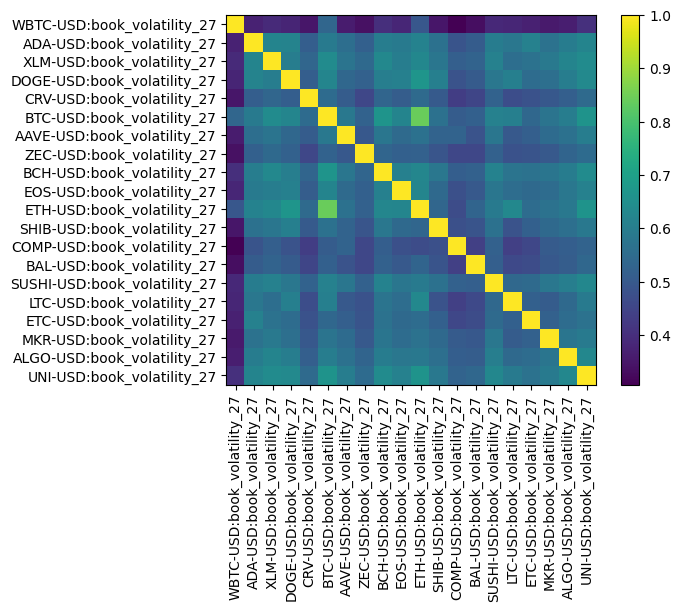

In [33]:
plt.imshow(corr)
plt.yticks(range(len(data.columns)), data.columns)
plt.xticks(range(len(data.columns)), data.columns, rotation='vertical')
plt.colorbar()

<AxesSubplot: >

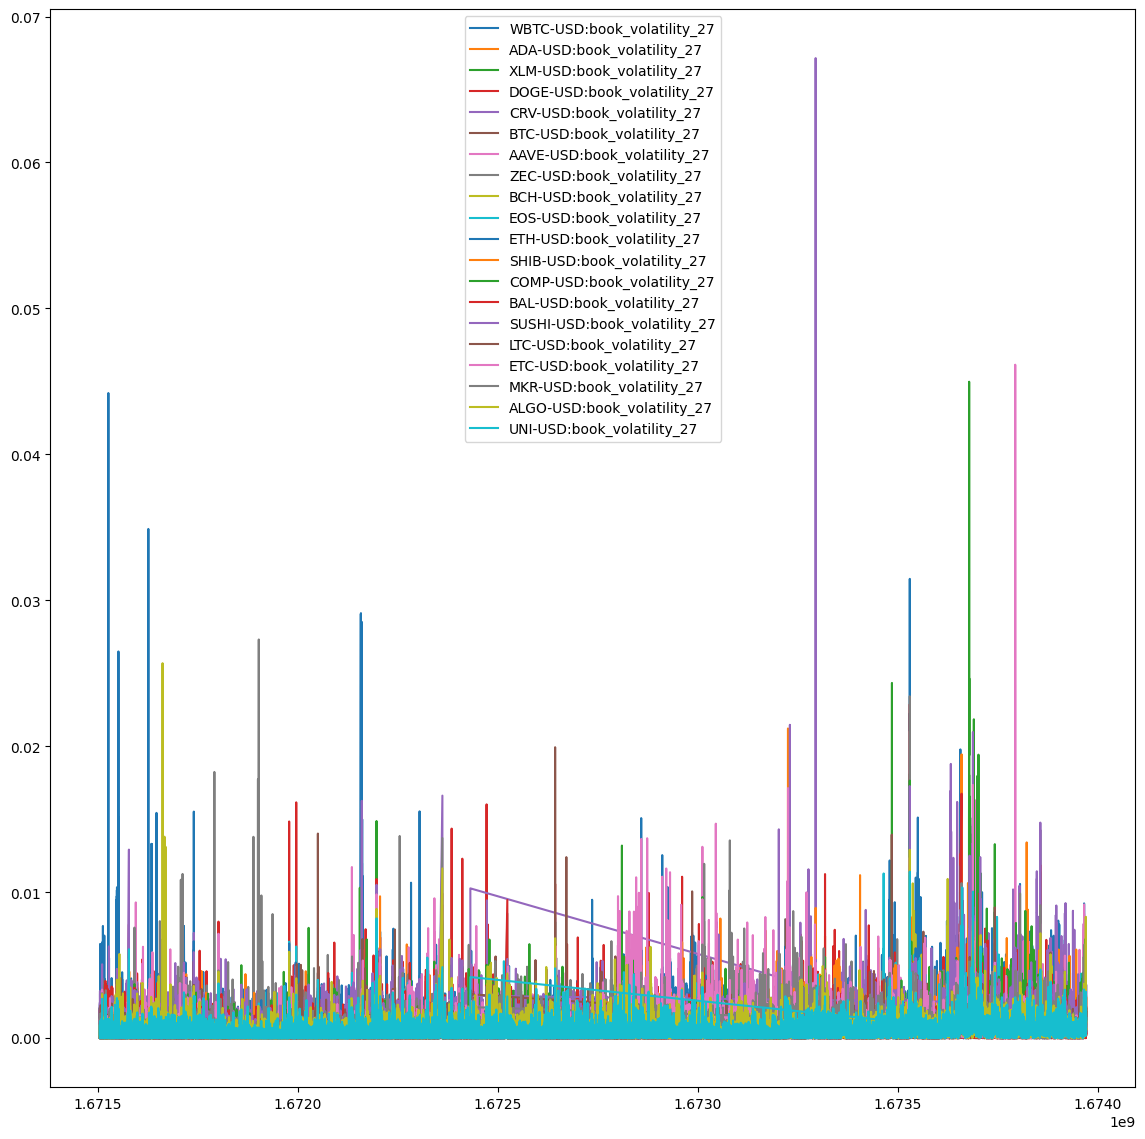

In [34]:
f,ax=plt.subplots(figsize=(14,14))
data.plot(ax=ax)